<a href="https://colab.research.google.com/github/drashtikshah/Data-analytics-project-file./blob/main/TimeSeriesForecasting_GoldMonthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name of the dataset: Gold price over the period of time

Problem statement: predicting the forecast of the future gold prices over the years.

this dataset has 2 columns of date and price of gold

importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

import dataset

In [3]:
df=pd.read_csv("/content/gold_monthly_csv.csv")
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [73]:
df.columns

Index(['Price'], dtype='object')

In [5]:
df.shape

(847, 2)

exploratory data anayslis

In [8]:
print(f"Date range of gold prices available from - {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df) - 1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [9]:
date=pd.date_range(start="1/1/1950",end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [10]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


here we have chnaged the columns name of date in the dataset to month.

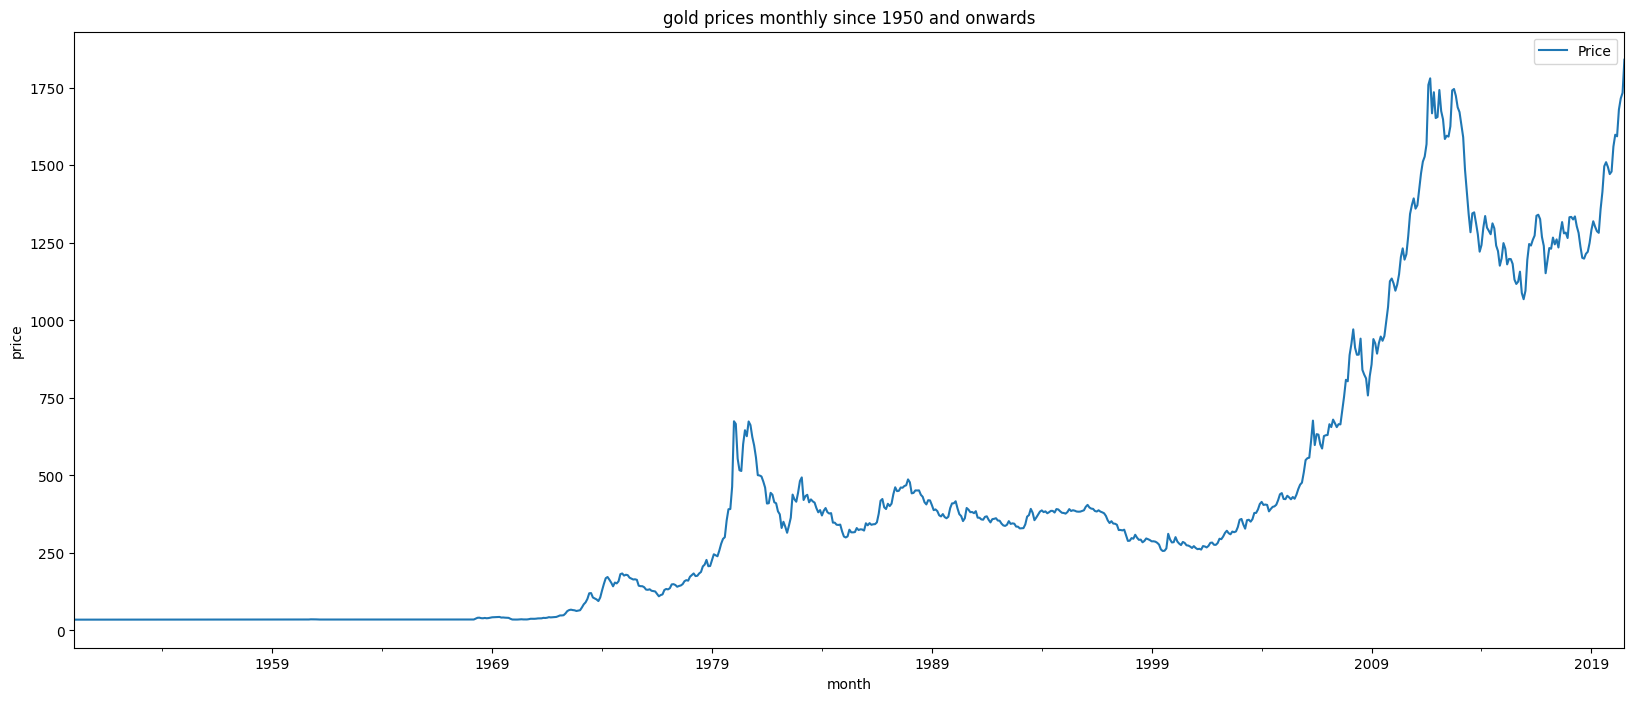

In [11]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel("month")
plt.ylabel("price")
plt.show()

this shows the increasing trend in the price of gold over the years

In [12]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


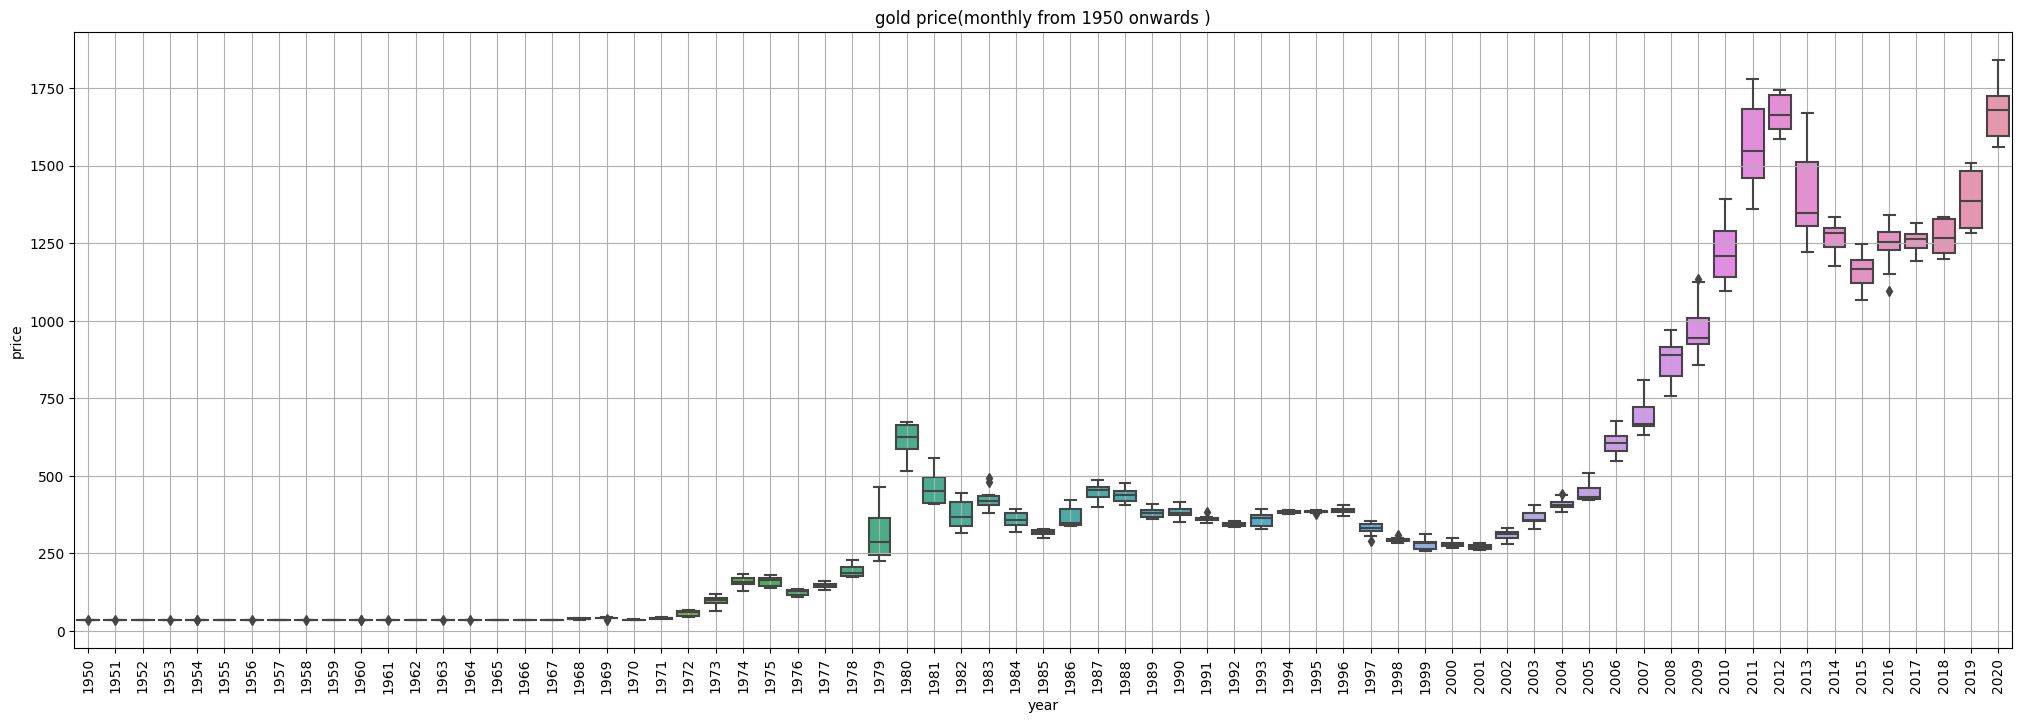

In [14]:
_,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title("gold price(monthly from 1950 onwards )")
plt.xlabel("year")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.grid()

we here can see the increase and decrease in the prices of gold

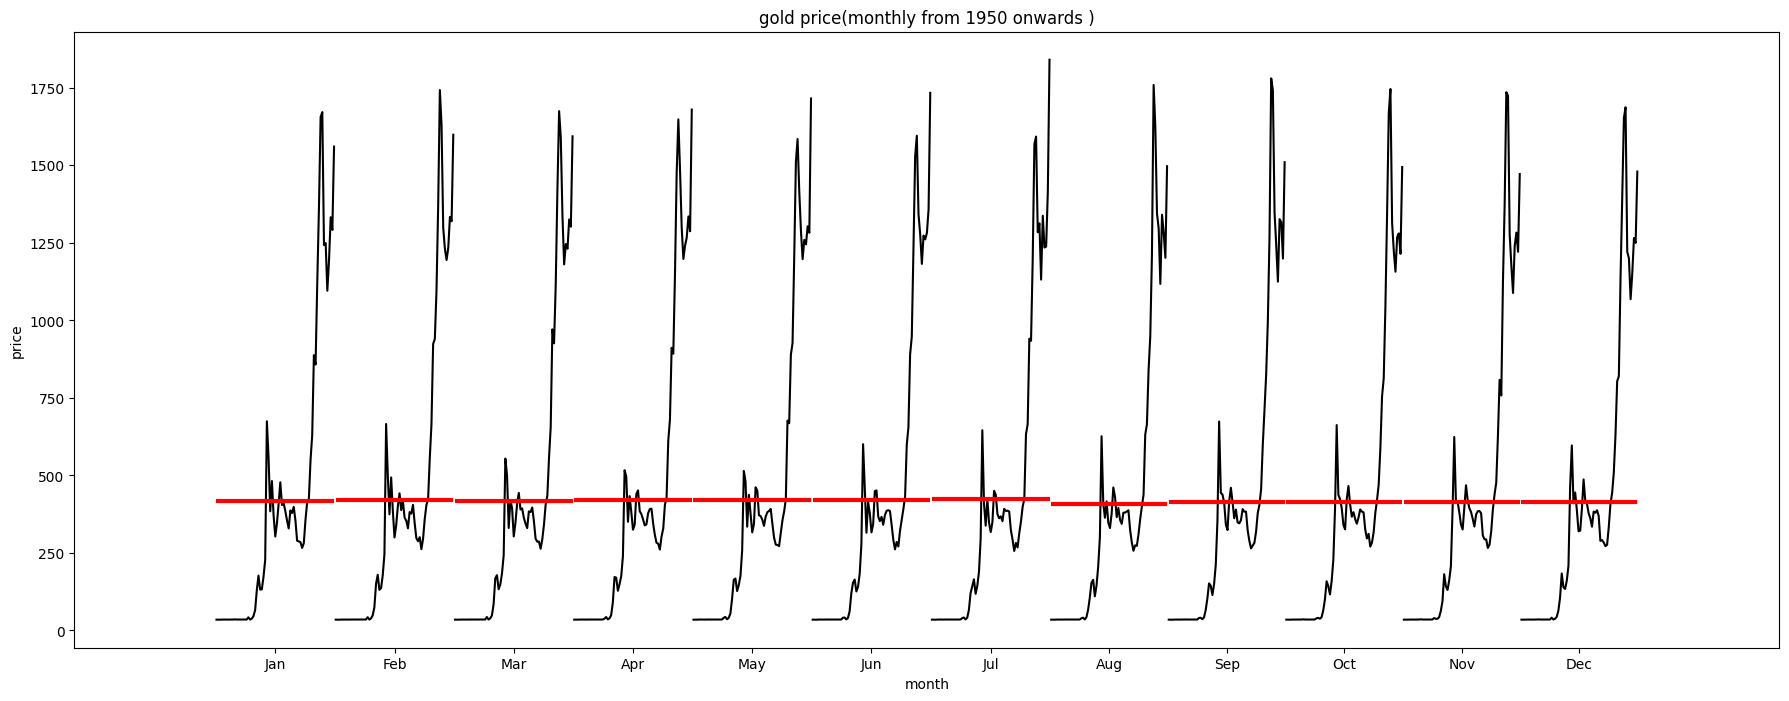

In [15]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax=plt.subplots(figsize=(22,8))
month_plot(df,ylabel="gold price",ax=ax)
plt.title("gold price(monthly from 1950 onwards )")
plt.xlabel("month")
plt.ylabel("price")
plt.show()

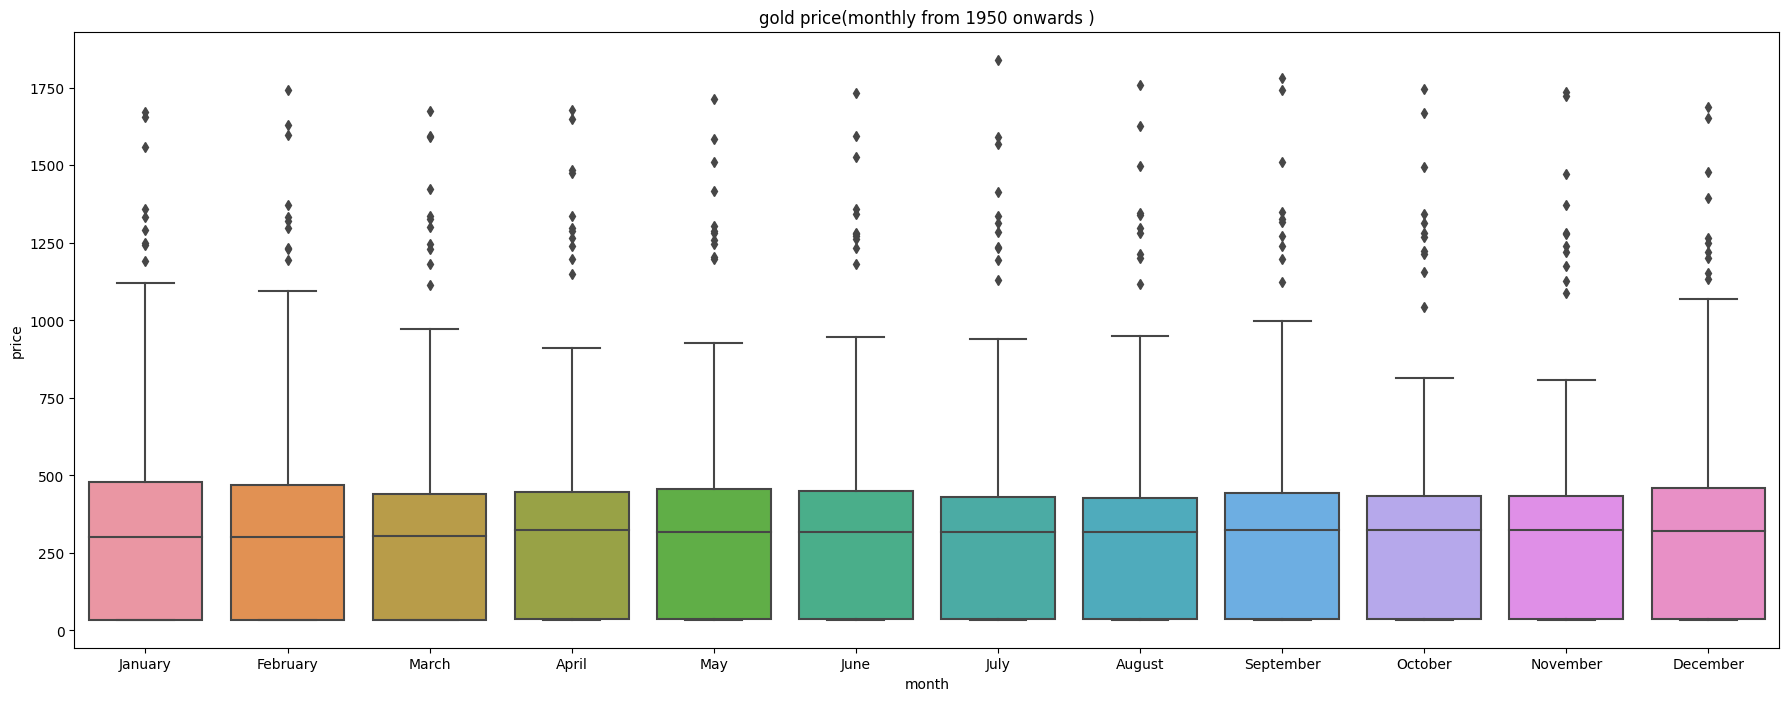

In [21]:
_,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title("gold price(monthly from 1950 onwards )")
plt.xlabel("month")
plt.ylabel("price")
plt.show()

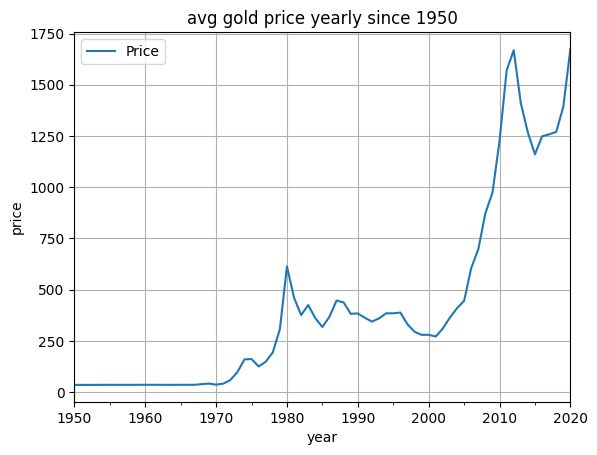

In [23]:
df_yearly_sum=df.resample("A").mean()
df_yearly_sum.plot()
plt.title("avg gold price yearly since 1950")
plt.xlabel("year")
plt.ylabel("price")
plt.grid()
plt.show()

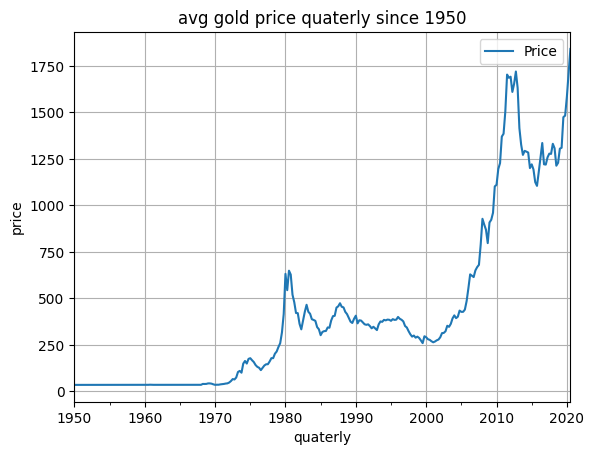

In [25]:
df_quaterly_sum=df.resample("Q").mean()
df_quaterly_sum.plot()
plt.title("avg gold price quaterly since 1950")
plt.xlabel("quaterly")
plt.ylabel("price")
plt.grid()
plt.show()

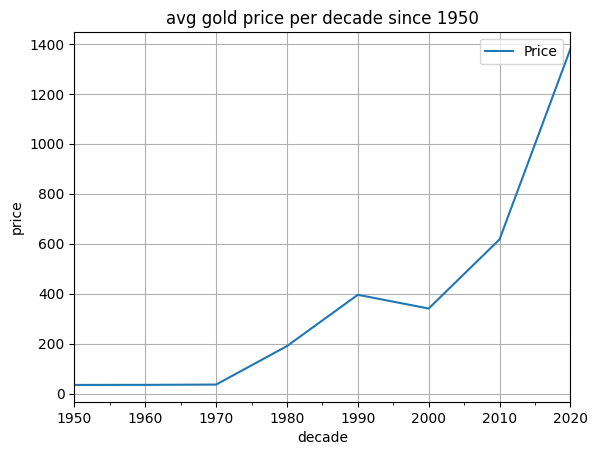

In [28]:
df_decade_sum=df.resample("10Y").mean()
df_decade_sum.plot()
plt.title("avg gold price per decade since 1950")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid()
plt.show()

 coeffiecnt of variation statical measure of relative disperion of data points in a data series around the mean and in the final variation it allows investor to determine how much mortality or risk is assumed in the comparsion of the amount like amount to the return expected from investors.lower the ratio of standard deviation to mean return the better risk return trade-off

In [32]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1["Cov_pct"]=((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


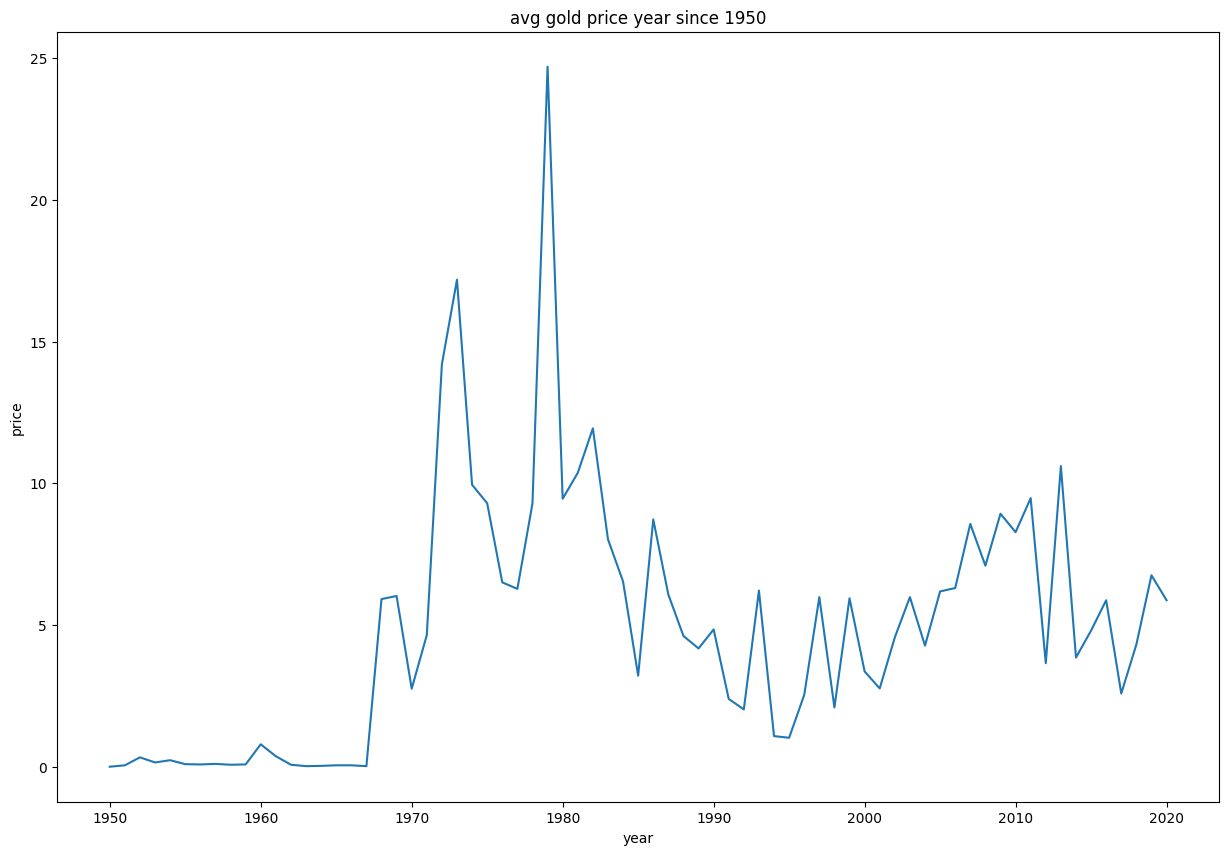

In [35]:
fig,ax=plt.subplots(figsize=(15,10))
df_1["Cov_pct"].plot()
plt.title("avg gold price year since 1950")
plt.xlabel("year")
plt.ylabel("price")
plt.show()

In 1978 it has the highest near 25% which could have made the asset as highly risky but in 2020 the cv value is closer to 5% which makes the asset variable a good investment

From now the nest steps are time series forecasting in which we will train the model diffrent models split and  train model

In [37]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]

we are dividing the model into training and testing where the months after 2015 will be included in training the dataset and years less then 2015 will be the testing model

In [38]:
print("Training dataset",train.shape)
print("Testing dataset",test.shape)

Training dataset (792, 1)
Testing dataset (55, 1)


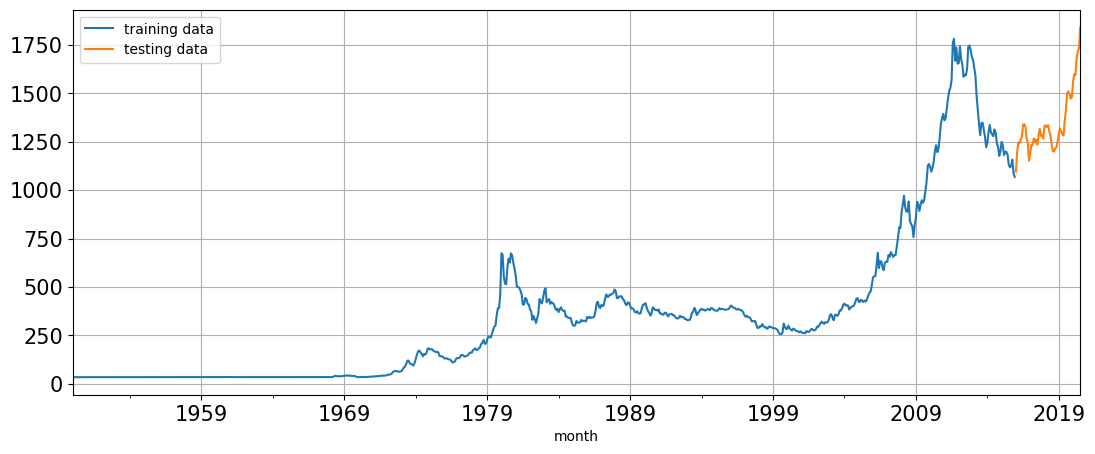

In [39]:
train['Price'].plot(figsize=(13,5),fontsize=15)
test["Price"].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['training data','testing data'])
plt.show()

here legend is the box which indicates which color holds which data in the graph

we will be using the two models:

Linear Regression

Naive Bayes

first we are using the linear regression model

In [40]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train) for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

here lr is linear regression

In [41]:
LR_train=train.copy()
LR_test=test.copy()

In [42]:
LR_train['time']= train_time
LR_test['time']=test_time

In [44]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

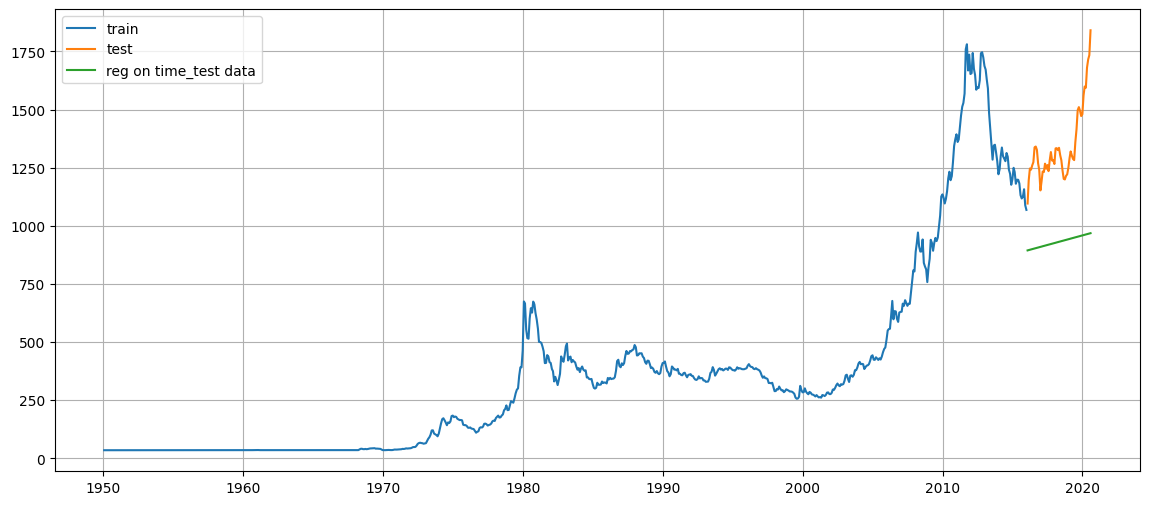

In [46]:
test_predictions_model1=lr.predict(LR_test[['time']])
LR_test['forecast']=test_predictions_model1
plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label='reg on time_test data')
plt.legend(loc='best')
plt.grid()

mape is the measure of prediction accuracy of a forecating method in stats.

In [50]:
def mape(actual,pred):
  return round((np.mean(abs(actual-pred)/actual))*100,2)

In [51]:
mape_model1_test=mape(test['Price'].values,test_predictions_model1)
print("Mape is %3.3f"%(mape_model1_test),'%')

Mape is 29.860 %


In [53]:
results=pd.DataFrame({"Test Mape(%)":[mape_model1_test]},index=['RegressionOnTime'])
results

,Test Mape(%)
RegressionOnTime,29.86


Now using the Naive Bayes on the dataset

In [54]:
Naive_train=train.copy()
Naive_test=test.copy()

In [55]:
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

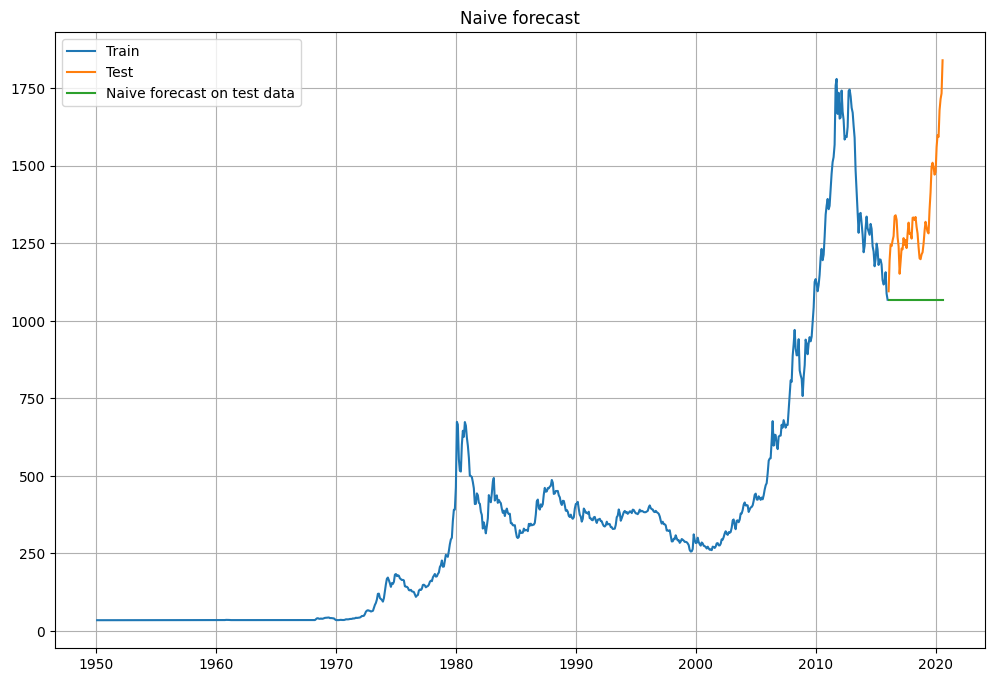

In [58]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label="Train")
plt.plot(Naive_test['Price'],label="Test")
plt.plot(Naive_test['naive'],label="Naive forecast on test data")
plt.legend(loc='best')
plt.title("Naive forecast")
plt.grid()

In [59]:
mape_model2_test=mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive forecast on the test data,Mape is %3.3f"%(mape_model2_test),'%')

For Naive forecast on the test data,Mape is 19.380 %


In [60]:
resultsDf_2=pd.DataFrame({"Test Mape(%)":[mape_model2_test]},index=['NaiveModel'])
results=pd.concat([results,resultsDf_2])
results

,Test Mape(%)
RegressionOnTime,29.86
NaiveModel,19.38


so now we are creating the final model(final forecasting)

In [62]:
final_model=ExponentialSmoothing(df,trend="additive",seasonal="additive").fit(smoothing_level=0.4,smoothing_trend=.3,smoothing_seasonal=0.6)

In [64]:
Mape_final_model=mape(df['Price'].values,final_model.fittedvalues)
print("Mape:",Mape_final_model)

Mape: 17.24


here we get mape as 17.24 which is quite good for the final model

In [67]:
prediction=final_model.forecast(steps=len(test))
pred_df=pd.DataFrame({"lower_CI":prediction - 1.96*np.std(final_model.resid,ddof=1),'prediction':prediction,'upper_CI':prediction+1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


plotting the graph of forecasts graph along with confidence interval band

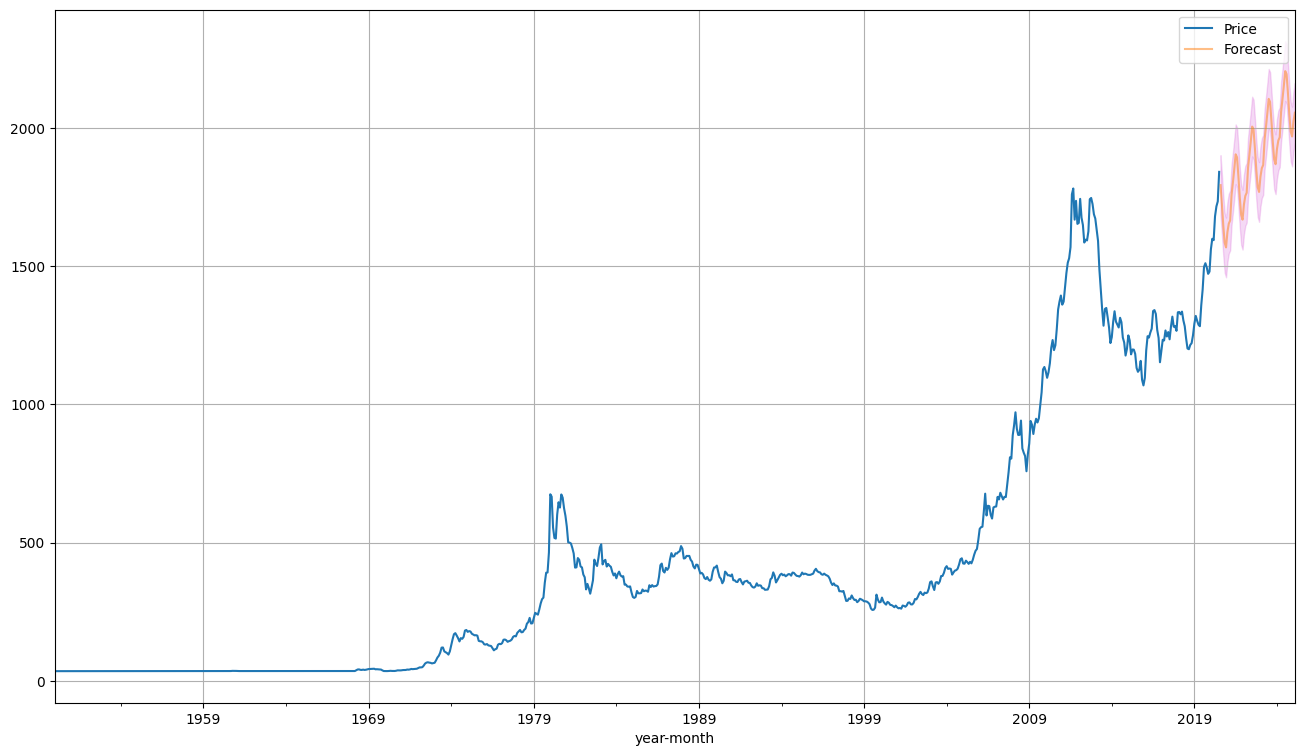

In [69]:
axis=df.plot(label="Actual",figsize=(16,9))
pred_df['prediction'].plot(ax=axis,label="Forecast",alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df["upper_CI"],color='m',alpha=.15)
axis.set_xlabel('year-month')
axis.legend(loc='best')
plt.grid()
plt.show()